In [76]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Loading data
df = pd.read_csv('updated_passengers.csv')
df.head(5) 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_destination,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,country_route
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,New Zealand,China,0,0,0,7.21,1,AKL,HGH,New Zealand to China
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,1,0,0,5.52,0,AKL,DEL,New Zealand to India
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,0,0,0,5.52,0,AKL,DEL,New Zealand to India
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,1,1,0,5.52,0,AKL,DEL,New Zealand to India
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,0,0,1,5.52,0,AKL,DEL,New Zealand to India


# Booking Origin

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_72838/2008510760.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


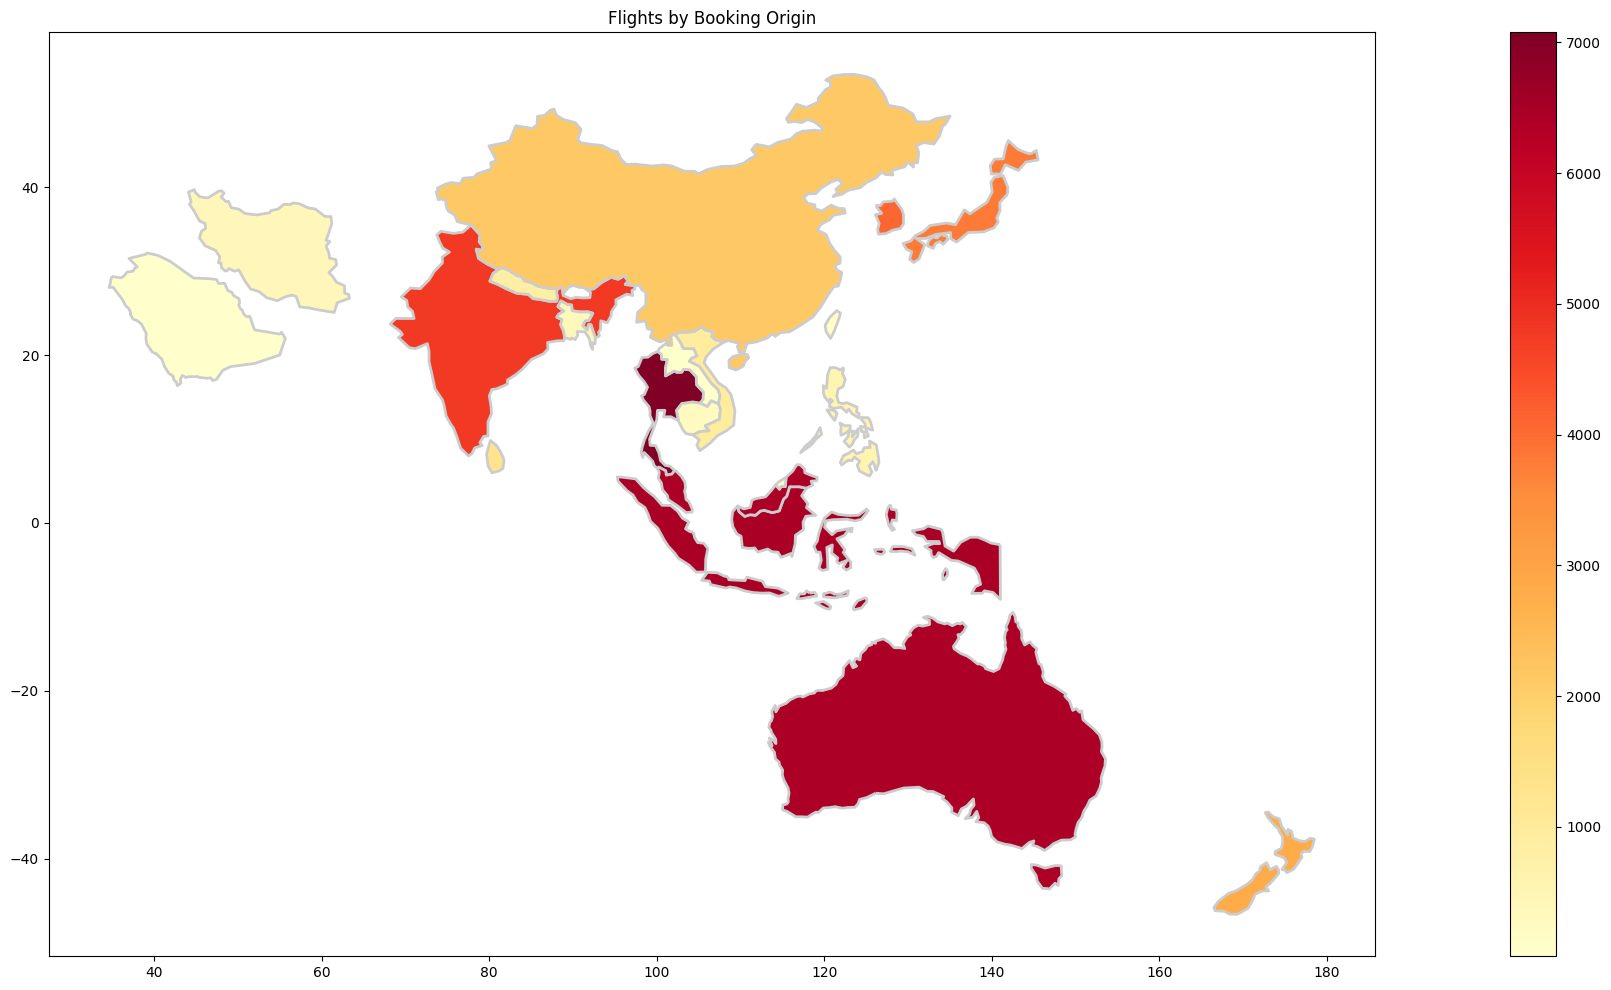

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_origin'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_origin', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Origin')

plt.show()

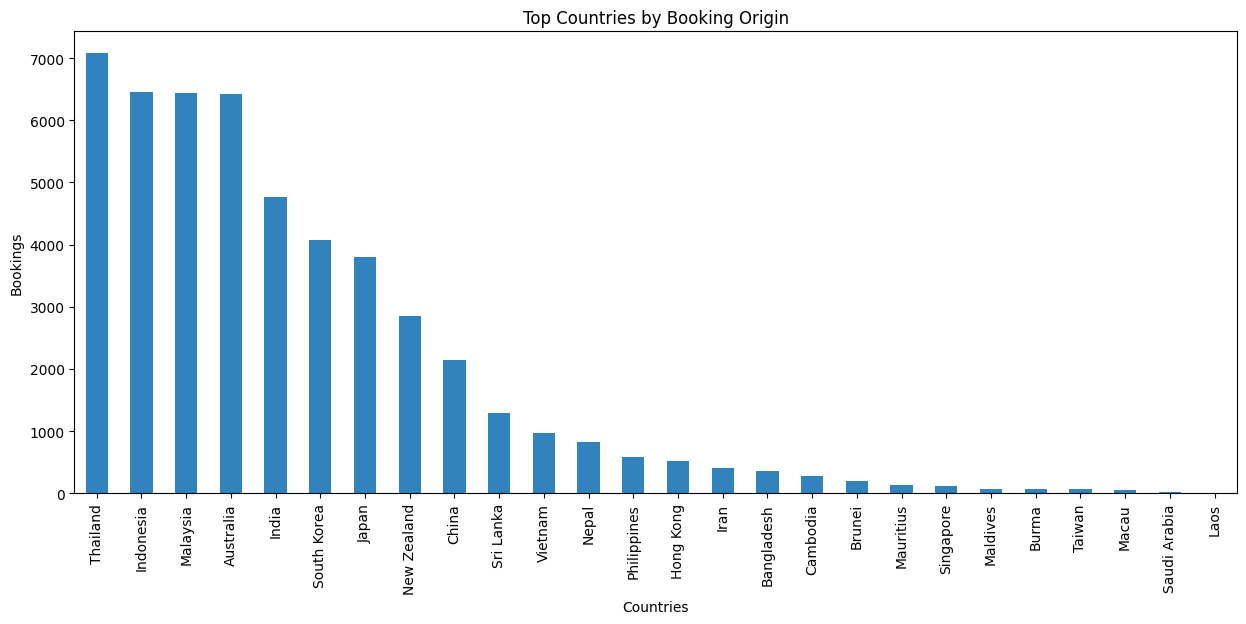

In [49]:
value_counts = df['booking_origin'].value_counts()

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top Countries by Booking Origin')

# Display the plot
plt.show()

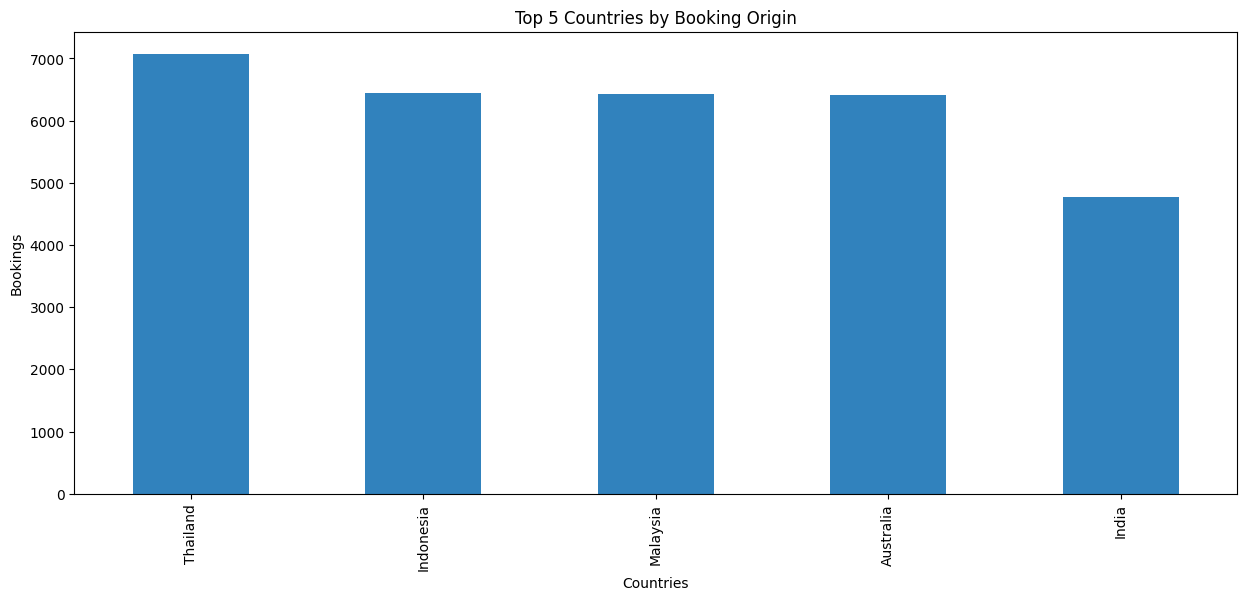

In [50]:
value_counts = df['booking_origin'].value_counts().head(5)

fig, ax = plt.subplots(figsize=(15, 6))
value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 5 Countries by Booking Origin')

# Display the plot
plt.show()

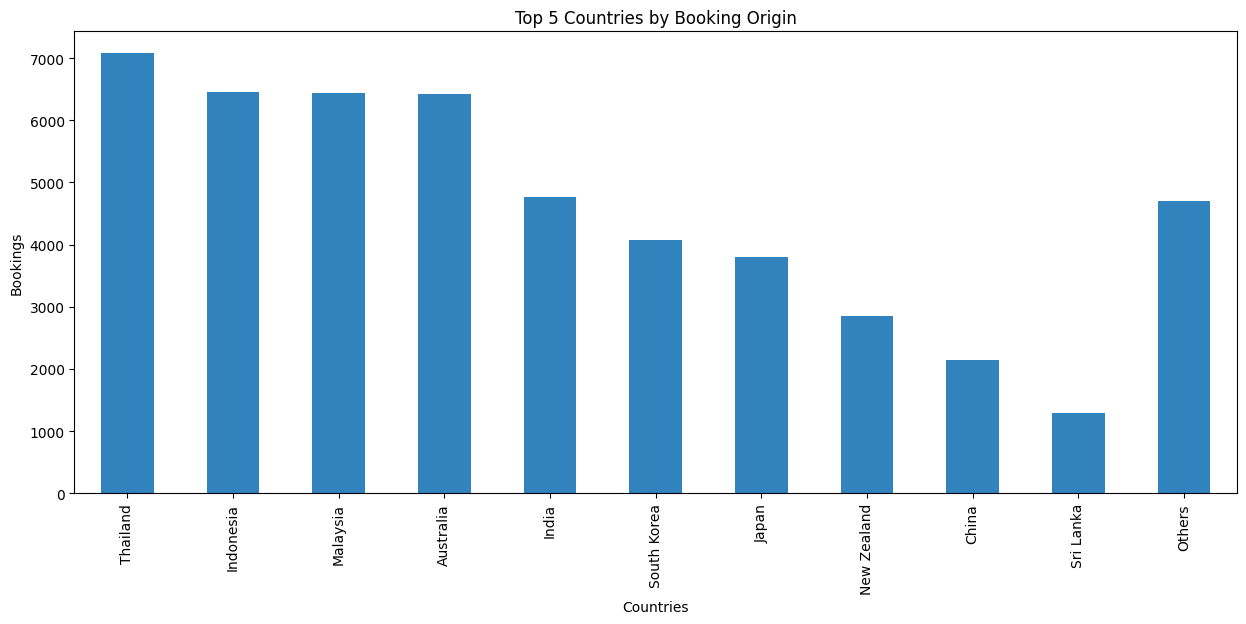

In [51]:
value_counts = df['booking_origin'].value_counts()

top_5_counts = value_counts.head(10)
other_count = value_counts[10:].sum()
new_value_counts = pd.concat([top_5_counts, pd.Series({'Others': other_count})])

fig, ax = plt.subplots(figsize=(15, 6))
new_value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 5 Countries by Booking Origin')

plt.show()

# Booking Destination

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_72838/3880249623.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


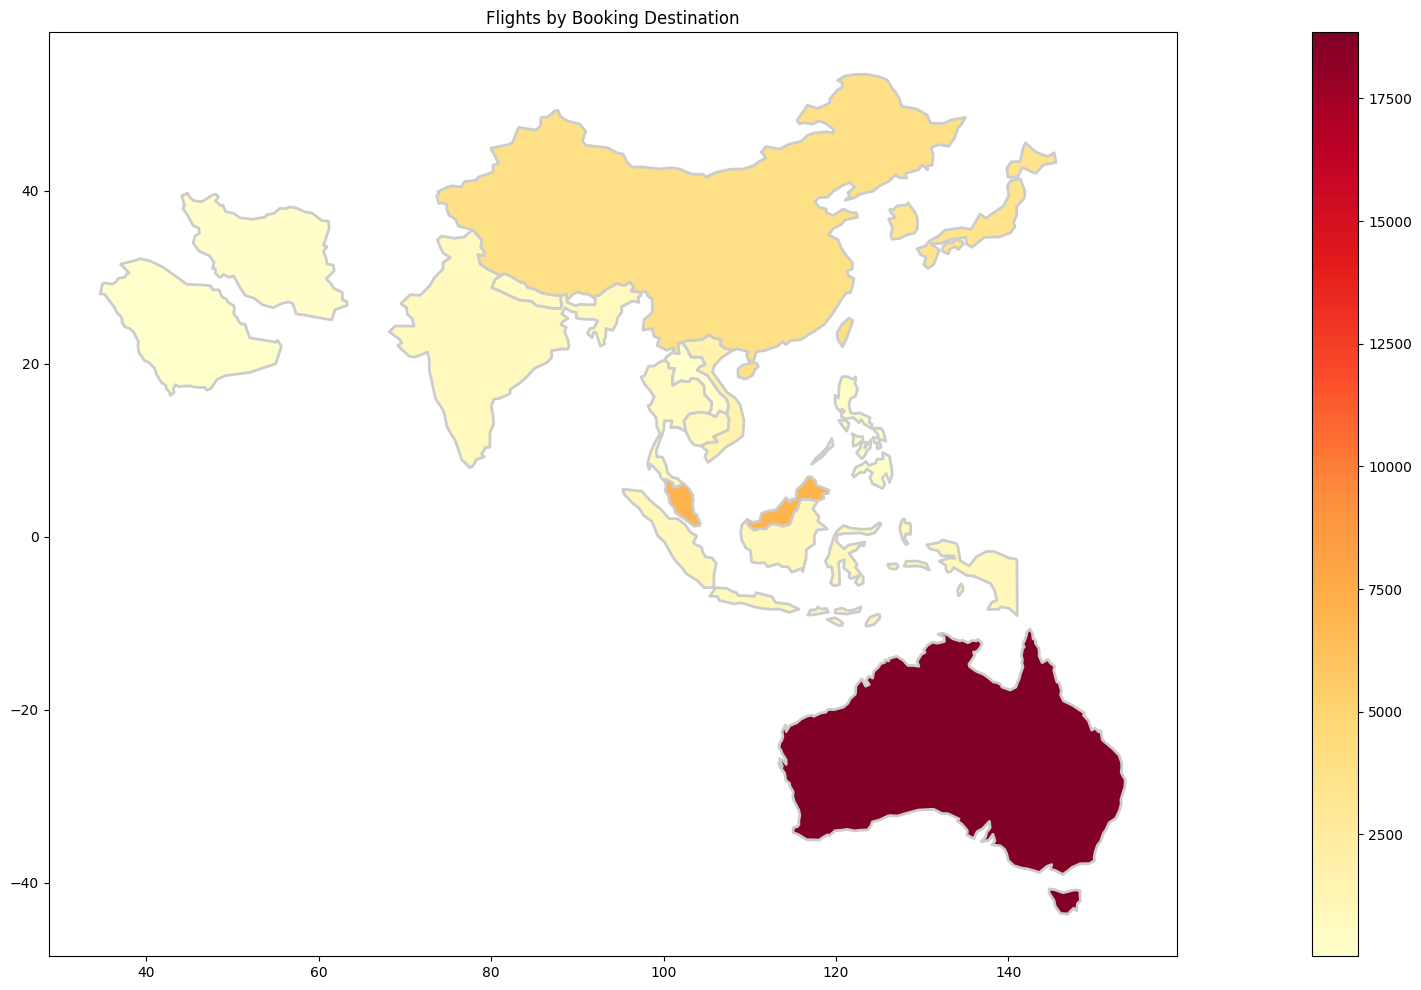

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_destination'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_destination', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Destination')

plt.show()

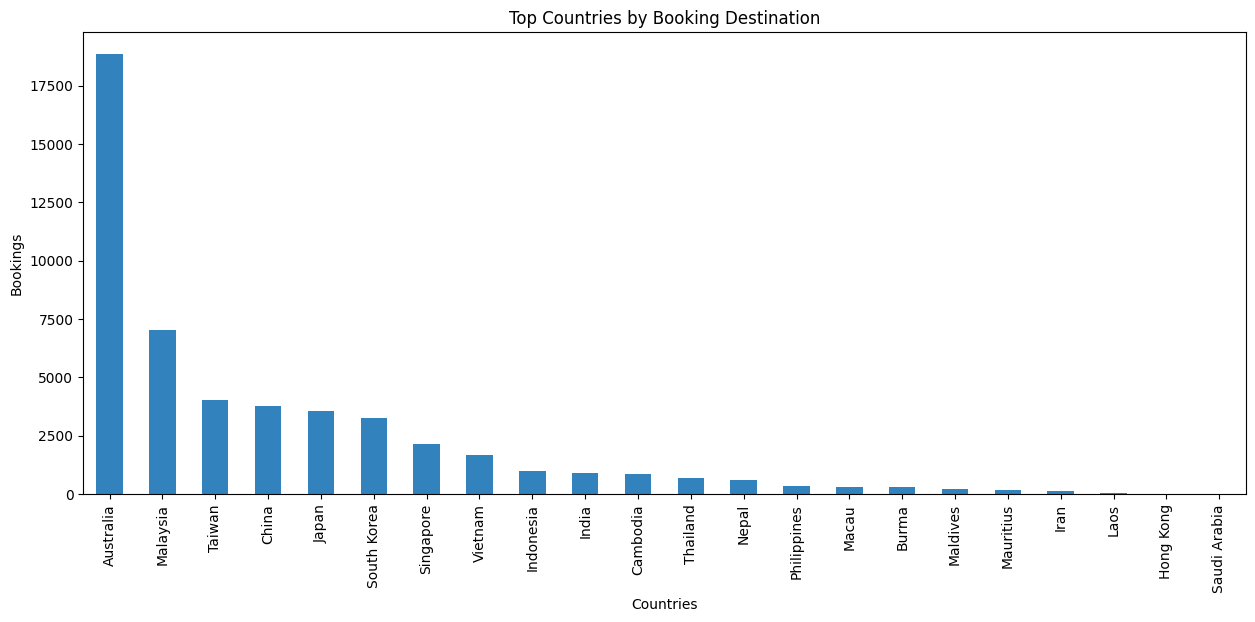

In [53]:
value_counts = df['booking_destination'].value_counts()

fig, ax = plt.subplots(figsize=(15, 6))

value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top Countries by Booking Destination')

# Display the plot
plt.show()

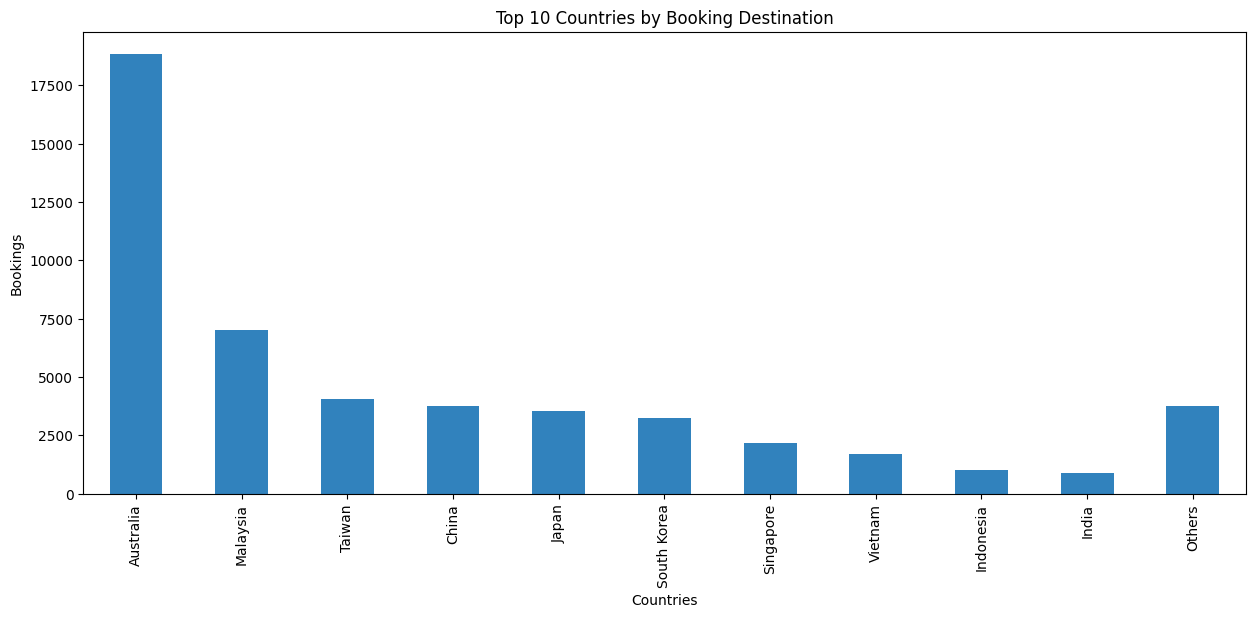

In [54]:
value_counts = df['booking_destination'].value_counts()

top_5_counts = value_counts.head(10)
other_count = value_counts[10:].sum()
new_value_counts = pd.concat([top_5_counts, pd.Series({'Others': other_count})])

fig, ax = plt.subplots(figsize=(15, 6))
new_value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Countries by Booking Destination')

plt.show()

# Routes

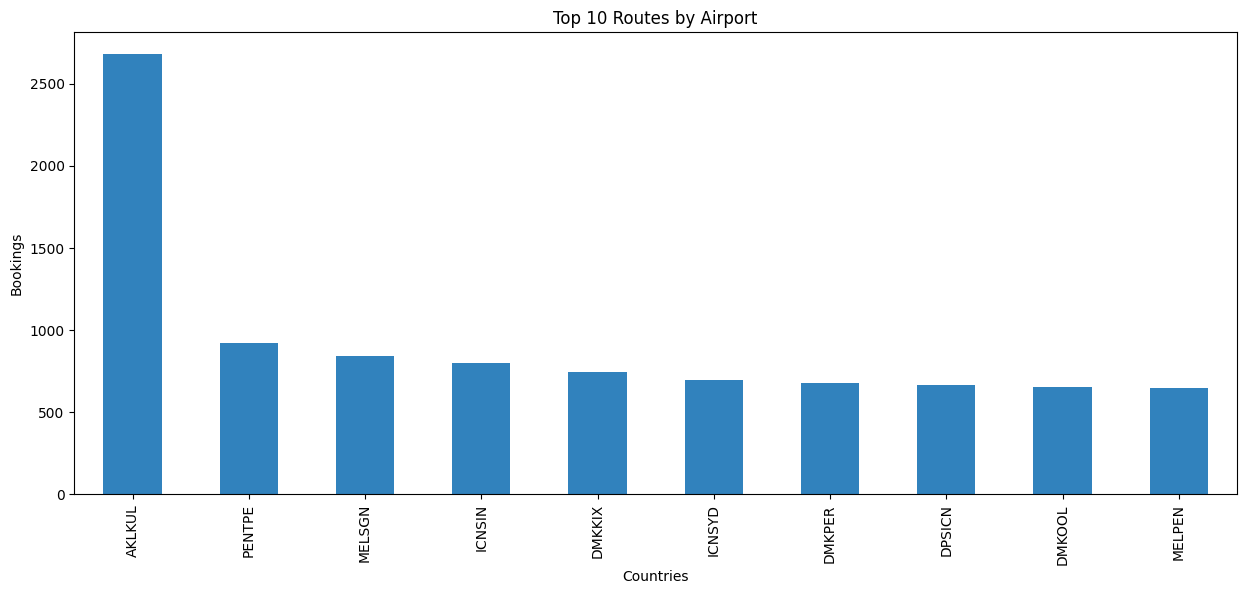

In [79]:
value_counts = df['route'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Routes by Airport')

# Display the plot
plt.show()

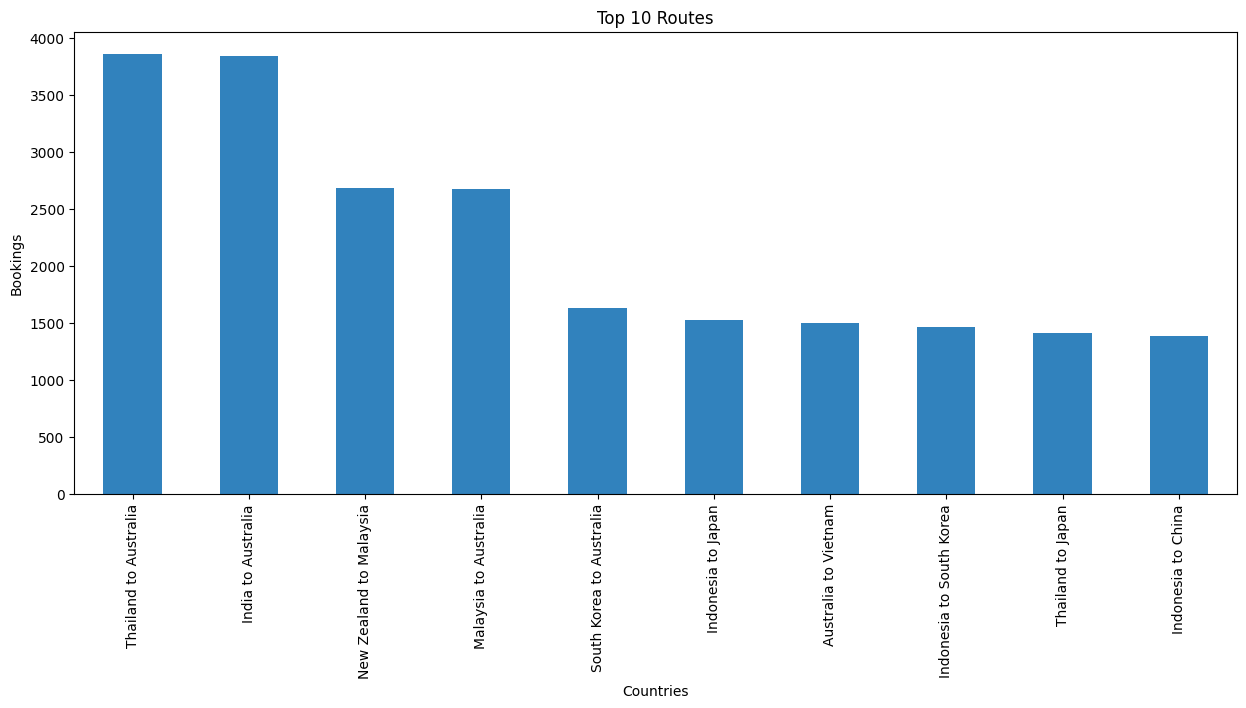

In [78]:
value_counts = df['country_route'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Routes by Country')

# Display the plot
plt.show()

# Additional Services

In [81]:
# Mapping of countries to regions
country_to_region = {
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "India": "South Asia",
    "United Kingdom": "Western Europe",
    "China": "East Asia",
    "South Korea": "East Asia",
    "Canada": "North America",
    "Japan": "East Asia",
    "Malaysia": "Southeast Asia",
    "Singapore": "Southeast Asia",
    "Switzerland": "Western Europe",
    "Germany": "Western Europe",
    "Indonesia": "Southeast Asia",
    "Czech Republic": "Eastern Europe",
    "Vietnam": "Southeast Asia",
    "Thailand": "Southeast Asia",
    "Spain": "Southern Europe",
    "Romania": "Eastern Europe",
    "Ireland": "Western Europe",
    "Italy": "Southern Europe",
    "Slovakia": "Eastern Europe",
    "United Arab Emirates": "Middle East",
    "Tonga": "Oceania",
    "Réunion": "Eastern Africa",
    "(not set)": "Not specified",
    "Saudi Arabia": "Middle East",
    "Netherlands": "Western Europe",
    "Qatar": "Middle East",
    "Hong Kong": "East Asia",
    "Philippines": "Southeast Asia",
    "Sri Lanka": "South Asia",
    "France": "Western Europe",
    "Croatia": "Southeast Europe",
    "United States": "North America",
    "Laos": "Southeast Asia",
    "Hungary": "Eastern Europe",
    "Portugal": "Southern Europe",
    "Cyprus": "Southern Europe",
    "Cambodia": "Southeast Asia",
    "Poland": "Eastern Europe",
    "Belgium": "Western Europe",
    "Oman": "Middle East",
    "Bangladesh": "South Asia",
    "Kazakhstan": "Central Asia",
    "Brazil": "South America",
    "Turkey": "Middle East",
    "Kenya": "Eastern Africa",
    "Taiwan": "East Asia",
    "Brunei": "Southeast Asia",
    "Chile": "South America",
    "Bulgaria": "Eastern Europe",
    "Ukraine": "Eastern Europe",
    "Denmark": "Northern Europe",
    "Colombia": "South America",
    "Iran": "Middle East",
    "Bahrain": "Middle East",
    "Solomon Islands": "Oceania",
    "Slovenia": "Southeast Europe",
    "Mauritius": "Eastern Africa",
    "Nepal": "South Asia",
    "Russia": "Eastern Europe",
    "Kuwait": "Middle East",
    "Mexico": "North America",
    "Sweden": "Northern Europe",
    "Austria": "Western Europe",
    "Lebanon": "Middle East",
    "Jordan": "Middle East",
    "Greece": "Southern Europe",
    "Mongolia": "East Asia",
    "Tanzania": "Eastern Africa",
    "Peru": "South America",
    "Timor-Leste": "Southeast Asia",
    "Argentina": "South America",
    "New Caledonia": "Oceania",
    "Macau": "East Asia",
    "Myanmar (Burma)": "Southeast Asia",
    "Norway": "Northern Europe",
    "Panama": "North America",
    "Bhutan": "South Asia",
    "Norfolk Island": "Oceania",
    "Finland": "Northern Europe",
    "Nicaragua": "Central America",
    "Maldives": "South Asia",
    "Egypt": "Northern Africa",
    "Israel": "Middle East",
    "Tunisia": "Northern Africa",
    "South Africa": "Southern Africa",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Estonia": "Eastern Europe",
    "Seychelles": "Eastern Africa",
    "Afghanistan": "South Asia",
    "Guam": "Oceania",
    "Czechia": "Eastern Europe",
    "Malta": "Southern Europe",
    "Vanuatu": "Oceania",
    "Belarus": "Eastern Europe",
    "Pakistan": "South Asia",
    "Iraq": "Middle East",
    "Ghana": "West Africa",
    "Gibraltar": "Southern Europe",
    "Guatemala": "Central America",
    "Algeria": "Northern Africa",
    "Svalbard & Jan Mayen": "Northern Europe"
}
df['region'] = df['booking_origin'].map(country_to_region)

df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_destination,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,country_route,region
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,New Zealand,China,0,0,0,7.21,1,AKL,HGH,New Zealand to China,Oceania
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,1,0,0,5.52,0,AKL,DEL,New Zealand to India,Oceania
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,0,0,0,5.52,0,AKL,DEL,New Zealand to India,Oceania
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,1,1,0,5.52,0,AKL,DEL,New Zealand to India,Oceania
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,0,0,1,5.52,0,AKL,DEL,New Zealand to India,Oceania


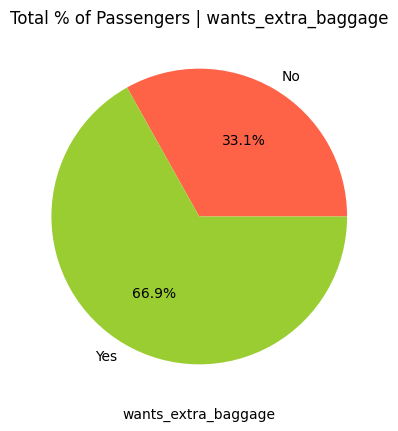

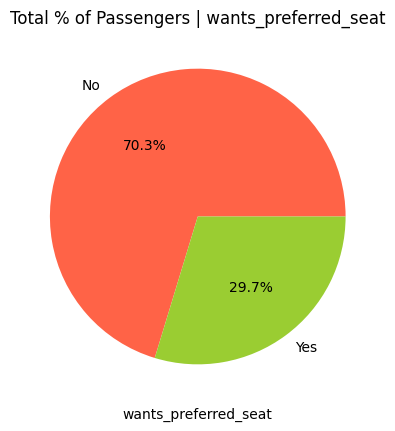

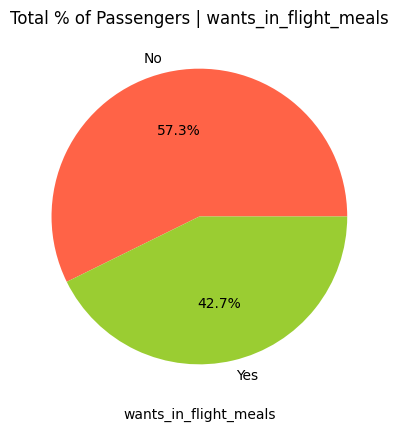

In [107]:
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

for service in services :
    count = df[service].value_counts().sort_index()
    #count.plot(kind='pie')
    plt.pie(count, labels=["No","Yes"], autopct='%1.1f%%',colors=["tomato","yellowgreen"])

    plt.xlabel(service)
    plt.title(f"Total % of Passengers | {service}")
    plt.show()

In [111]:
df['wants_in_flight_meals'].corr(df['flight_duration'])


0.15428002244053143

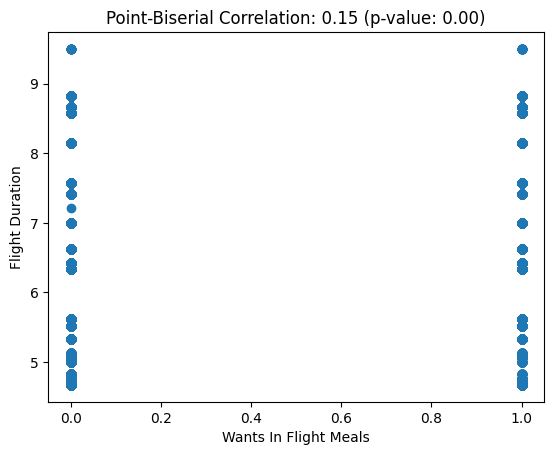

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(df['wants_in_flight_meals'], df['flight_duration'])

# Create a scatter plot of the data
plt.scatter(df['wants_in_flight_meals'], df['flight_duration'])

# Add labels and title
plt.xlabel('Wants In Flight Meals')
plt.ylabel('Flight Duration')
plt.title(f'Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

#weak correlation
#https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php

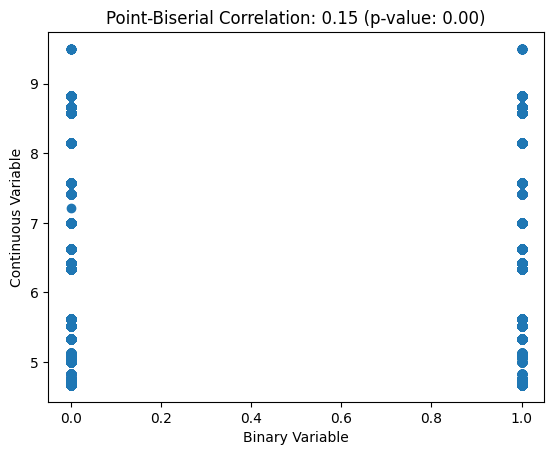

In [129]:
correlation_coefficient, p_value = stats.pointbiserialr(df['wants_in_flight_meals'], df['flight_duration'])

# Define the outlier threshold (e.g., using z-scores)
z_score_threshold = 3

# Calculate the z-scores for the continuous variable
z_scores = (df['flight_duration']- np.mean(df['flight_duration'])) / np.std(df['flight_duration'])

# Filter outliers based on the z-score threshold
filtered_a = df['wants_in_flight_meals'][abs(z_scores) <= z_score_threshold]
filtered_b = df['flight_duration'][abs(z_scores) <= z_score_threshold]

# Create a scatter plot of the filtered data
plt.scatter(filtered_a, filtered_b)

# Add labels and title
plt.xlabel('Binary Variable')
plt.ylabel('Continuous Variable')
plt.title(f'Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

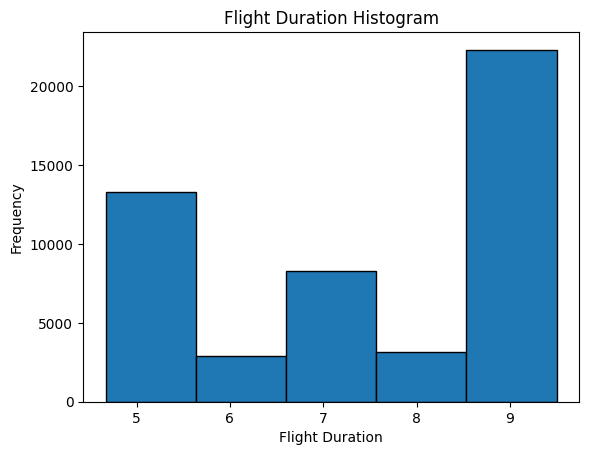

In [124]:
plt.hist(df['flight_duration'], bins=5, edgecolor='black')

plt.xlabel('Flight Duration')
plt.ylabel('Frequency')
plt.title('Flight Duration Histogram')

# Display the histogram
plt.show()

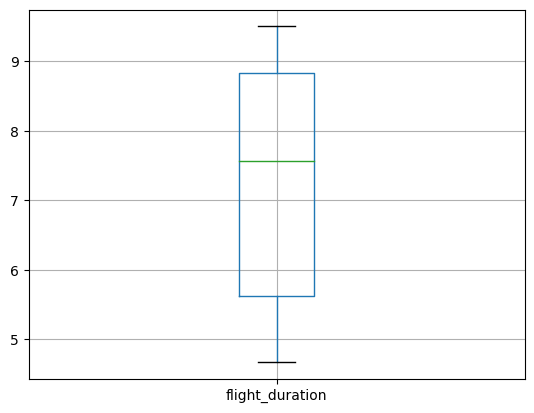

In [126]:
df.boxplot(column='flight_duration')
plt.show()

## By Region